#SD204  TP SVD-PCA

In [15]:
import numpy as np
import scipy as sp
import time
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
%matplotlib inline
plt.close()

###Exercice 1. Retour sur l’algèbre linéaire
####(1)

In [16]:
mu, sigma= 0, 2
lam = 1e-5
#(a)
n, p = 100,2000
X = sigma * np.random.randn(n,p) + mu  # X
y = np.random.uniform(-1,1,n)          # y
Id_n = np.identity(n)                  # Unit vector Id_n
Id_p = np.identity(p)                  # Unit vector Id_p 
timeS = time.time()
left = np.dot(X.T,np.linalg.solve(np.add(np.dot(X,X.T),np.dot(lam,Id_n)),y))
timeE = time.time()
time_1L = timeE - timeS                  #the run time of the method on left (1)
timeS = time.time()
right = np.linalg.solve(np.add(np.dot(X.T,X),np.dot(lam,Id_p)),np.dot(X.T,y))
timeE = time.time()
time_1R = timeE - timeS                  #the run time of the method on right (1)
result = np.allclose(left,right)
print("(a) Avec n = 100 et p = 2000, la gauche et la droite sont égales ?")
print result

#(b)
n, p = 2000,100
X = sigma * np.random.randn(n,p) + mu 
y = np.random.uniform(-1,1,n)       
Id_n = np.identity(n)               
Id_p = np.identity(p)                  
timeS = time.time()
left = np.dot(X.T,np.linalg.solve(np.add(np.dot(X,X.T),np.dot(lam,Id_n)),y))
timeE = time.time()
time_2L = timeE - timeS                  #the run time of the method on left (2)
timeS = time.time()
right = np.linalg.solve(np.add(np.dot(X.T,X),np.dot(lam,Id_p)),np.dot(X.T,y))
timeE = time.time()
time_2R = timeE - timeS                  #the run time of the method on right (2)
result = np.allclose(left,right)
print("(b) Avec n = 2000 et p = 100, la gauche et la droite sont égales ?")
print result

(a) Avec n = 100 et p = 2000, la gauche et la droite sont égales ?
True
(b) Avec n = 2000 et p = 100, la gauche et la droite sont égales ?
True


&emsp;À partir de ces resultats, on voit que l'équation suivante est vraie:
$$X^T(XX^T+{\lambda}Id_n)^{-1}y=(X^TX+{\lambda}Id_p)^{-1}X^Ty$$

####(2)  
&emsp;Ici on compare le temps d'exécution des méthode gauche et méthode droite selon la taille de n et p:

In [14]:
print("(a) Pour n = 100, p = 2000:")
print("Le temps d'exécution pour la méthode gauche est %f" %time_1L)
print("Le temps d'exécution pour la méthode droite est %f" %time_1R)
print("(b) Pour n = 2000, p = 100:")
print("Le temps d'exécution pour la méthode gauche est %f" %time_2L)
print("Le temps d'exécution pour la méthode droite est %f" %time_2R)

(a) Pour n = 100, p = 2000:
Le temps d'exécution pour la méthode gauche est 0.003000
Le temps d'exécution pour la méthode droite est 0.565000
(b) Pour n = 2000, p = 100:
Le temps d'exécution pour la méthode gauche est 0.532000
Le temps d'exécution pour la méthode droite est 0.003000


&emsp;On voit que quand on utilise la dimention de 2000, le temps d'exécution est beaucoup plus grand que la dimention de 100. Donc on choisit l'une plus petite parmi n et p pour l’astuce du noyau.

###Exercice 2. Spectre de matrice aléatoire
####(3)
Pour cette question, la loi de poisson et la loi exponentielle sont choisies. Les moyennes sont mis nulle par moins 1 pour chaque élément dans une matrice comme ci-dessous:

In [17]:
n,p = 1000,200
X_poi = np.random.poisson(1, size = (n,p)) - 1
X_exp = np.random.exponential(1,size = (n,p)) - 1
'''
shape: k = 4  scale: theata = 0.5
X_gam = np.random.gamma(shape = 4, scale = 0.5, size = (n,p)) -1
'''

####(4) Les valeur singulière

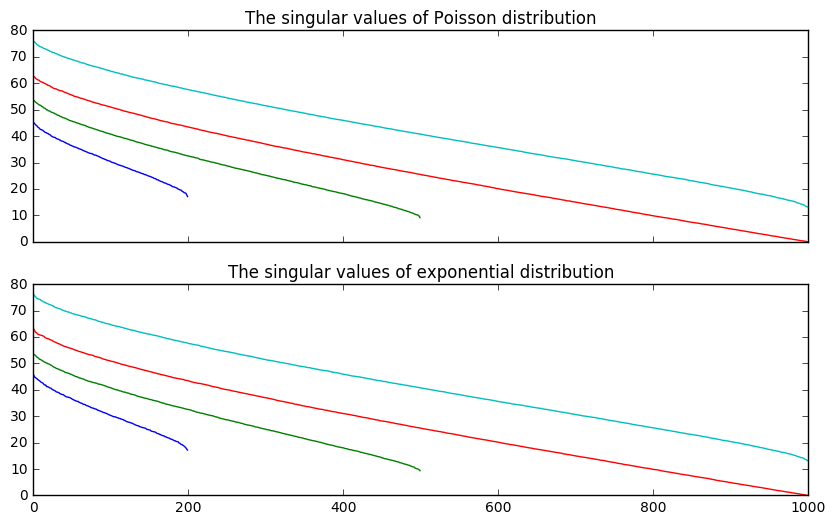

In [29]:
import matplotlib.pyplot as plt
n = 1000
p_array = [200,500,1000,2000]
'''
figure,ax = plt.subplots(2, sharex = True)
for p in p_array:
    X_gam = np.random.gamma(shape = 4, scale = 0.5, size = (n,p)) - 2
    s_gam = np.linalg.svd(X_gam, full_matrices=1,compute_uv=0)
    ax[0].plot(s_gam)
for p in p_array:
    X_nor = np.random.randn(n,p)
    s_nor = np.linalg.svd(X_nor, full_matrices=1,compute_uv=0)
    ax[1].plot(s_nor)
'''
fig, axes = plt.subplots(2,1, sharex = True, figsize=(10,6))
for p in p_array:
    X_poi = np.random.poisson(1, size = (n,p)) - 1
    s_poi = np.linalg.svd(X_poi, full_matrices=1,compute_uv=0)
    axes[0].plot(s_poi)
for p in p_array:
    X_exp = np.random.exponential(1, size = (n,p)) - 1
    s_exp = np.linalg.svd(X_exp, full_matrices=1,compute_uv=0)
    axes[1].plot(s_exp)
axes[0].set_title("The singular values of Poisson distribution")
axes[1].set_title("The singular values of exponential distribution")
plt.show()

####(5) Valeurs propres

In [ ]:
fig, axes = plt.subplots(2,1, sharex = True, figsize=(10,6))
for p in p_array:
    X_poi = np.random.poisson(1, size = (n,p)) - 1
    X = np.dot(X_poi.T,X_poi)/n
    evals, evecs = np.linalg.eig(X)
    axes[0].plot(evals)
for p in p_array:
    X_exp = np.random.exponential(1, size = (n,p)) - 1
    X = np.dot(X_exp.T,X_exp)/n
    evals, evecs = np.linalg.eig(X)
    axes[1].plot(evals)
plt.show()
'''
Question: I import np and sp, which both contains linalg, but why np.linalg, not sp.linalg?
'''

In [ ]:
#a = np.ones(shape=(5,2))
#a = np.matrix('1 2 3 4;5 6 7 8;9 8 7 6;5 4 3 2')     #<class 'numpy.matrixlib.defmatrix.matrix'>
'''
a = np.array([[1,2,3,4], 
              [5,6,7,8],
              [9,8,7,6],
              [5,4,3,2.]])   #<type 'numpy.ndarray'>
evals, evecs = np.linalg.eig(a)
print a.T*a/5
print type(a.T*a/5)
b = np.array([1,0,1,0])
np.linalg.norm(b)
c = np.ones((4,4))
print np.subtract(a,c)
'''
X = np.random.randn(3,4)
print X
print X[]

###Exercice 3. Méthode de la puissance itérée

####(6)
Pour la matrice $X \in \Bbb{R}^{p\times{n}}$ , $u \in \Bbb{R}^{p\times{1}}$ et $v \in \Bbb{R}^{n\times{1}}$ sont choisis aléatoirement comme les vecteurs initiaux

In [108]:
'''
mu, sigma= 0, 2
n, p = 100,2000
X = sigma * np.random.randn(p,n) + mu  
n_iter = 1000        # le nombre maximal d’itérations
u = np.random.randn(p,1)    # shape : (2000,1)
v = np.random.randn(n,1)    # u, v vecteurs initiaux
'''For question (7)'''
u_SVD,s,v_SVD = np.linalg.svd(X, full_matrices=1,compute_uv=1)
u_svd = u_SVD.T[0].reshape((p,1))               #u_SVD[0].shape: (2000,) Here we need (2000,1)
v_svd = v_SVD[0].reshape((n,1))
identi_u = np.zeros(n_iter)        #shape:(10000,) The norms of {u-u_SVD[0]}
identi_v = np.zeros(n_iter)
'''End'''
for j in range(0,n_iter):
    u = np.dot(X,v)
    v = np.dot(X.T,u)
    v = v * (1/np.linalg.norm(v))
    u = u * (1/np.linalg.norm(u))
    identi_u[j] = np.linalg.norm(np.subtract(u,u_svd))
    identi_v[j] = np.linalg.norm(np.subtract(v,v_svd))
'''

SyntaxError: invalid syntax (<ipython-input-108-ead320cab45a>, line 8)

####(7)
Pour la question ci-dessous:<br>
- u_SVD est la matrice obtenue par la méthode np.linalg.svd<br>
- u&emsp;&emsp;&emsp;est le vecteur obtenu par la méthode de la puissance itérée

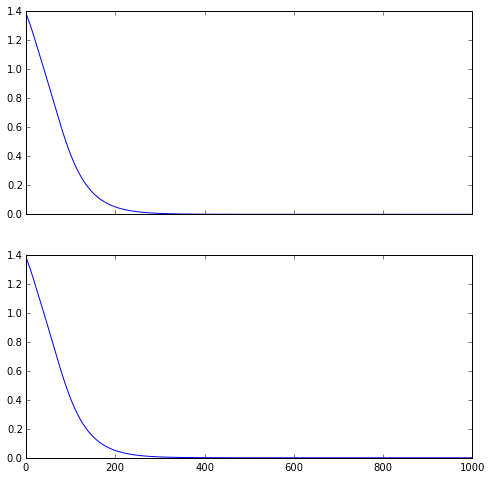

In [30]:
'''
fig, axes = plt.subplots(2,1, sharex = True, figsize=(8,8))
axes[0].plot(identi_u)
axes[1].plot(identi_v)
plt.show()
'''

####(8)

In [ ]:
U = np.zeros((4,p))
#U = [np.random.randn(p,1),np.ones((p,1)),np.arange(p),np.random.uniform(0,1,p)]
#U[0].T =np.ones((p,1))  # shape : (2000,1)
#V[0]   # u, v vecteurs initiaux
print U[0].T.shape
np.ones((p,1)).reshape((p,))
print np.ones((p,1)).shape

In [90]:
def powerIteration(X,n_iter,u0,v0):
    # Create new arrays to store the norms:
    identi_u = np.zeros(n_iter)
    identi_v = np.zeros(n_iter)
    for j in range(0,n_iter):
        u = np.dot(X,v0)
        v = np.dot(X.T,u0)
        u_uni = np.dot(u,(1/np.linalg.norm(u)))
        v_uni = np.dot(v,(1/np.linalg.norm(v)))
        #v = v * (1/np.linalg.norm(v))
        #u = u * (1/np.linalg.norm(u))
        identi_u[j] = np.linalg.norm(np.subtract(u,u_svd))
        identi_v[j] = np.linalg.norm(np.subtract(v,v_svd))
        u0,v0 = u,v

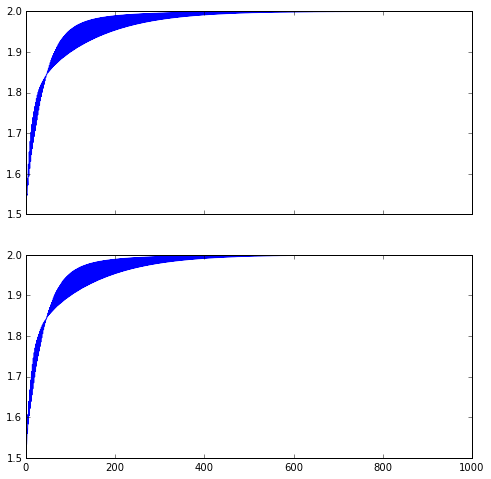

In [117]:
import numpy as np
import scipy as sp
import time
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import os
%matplotlib inline
os.system('cls')
plt.close()

def powerIteration(X,n_iter,u0,v0):     #X: (p,n)
    # Get the shape of matrix X:
    p,n = X.shape[0],X.shape[1]         # X: (p*n) 
    # Get the decomposition of X:
    u_SVD,s,v_SVD = np.linalg.svd(X, full_matrices=1,compute_uv=1)   #u_SVD:(p,p); v_SVD.T:(n,n)
    # Reshape the singular vectors associated to the largest sigular value:
    u_svd = u_SVD.T[0].reshape((p,1))
    v_svd = v_SVD[0].reshape((n,1))
    # Create new arrays to store the norms:
    identi_u = np.zeros(n_iter)        #shape:(10000,) The norms of {u-u_SVD[0]}
    identi_v = np.zeros(n_iter)
    for j in range(0,n_iter):
        u = np.dot(X,v0)
        v = np.dot(X.T,u0)
        u_uni = np.dot(u,(1/np.linalg.norm(u)))
        v_uni = np.dot(v,(1/np.linalg.norm(v)))
        identi_u[j] = np.linalg.norm(np.subtract(u_uni,u_svd))
        identi_v[j] = np.linalg.norm(np.subtract(v_uni,v_svd))
        u0,v0 = u_uni,v_uni
    return identi_u,identi_v
    

mu, sigma= 0, 2
n, p = 100,2000
X = sigma * np.random.randn(p,n) + mu  
n_iter = 1000        # le nombre maximal d’itérations
#u = np.random.randn(p,1)    # shape : (2000,1)
#v = np.random.randn(n,1)    # u, v vecteurs initiaux
u = np.ones((p,1))
v = np.ones((n,1))
fig, axes = plt.subplots(2,1, sharex = True, figsize=(8,8))
identi_u,identi_v = powerIteration(X,n_iter,u,v)
axes[0].plot(identi_u)
axes[1].plot(identi_v)
plt.show()

In [93]:
import numpy as np
import scipy as sp
import time
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import os
%matplotlib inline
os.system('cls')
plt.close()

mu, sigma= 0, 2
n, p = 100,2000
X = sigma * np.random.randn(p,n) + mu  
p,n = X.shape[0],X.shape[1] 
print p,n

2000 100


In [107]:
u = 1
v = 2
u0,v0 = u,v
print u0,v0

1 2
